In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

# Univariate Analysis

In [3]:
CC_Data=pd.read_csv("Credit Card Customer Data 1.csv")
print(CC_Data.shape)
print()
print(CC_Data.describe())
print()
print(CC_Data.info())

(660, 7)

            Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000  55141.443939      34574.242424            4.706061   
std    190.669872  25627.772200      37625.487804            2.167835   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    165.750000  33825.250000      10000.000000            3.000000   
50%    330.500000  53874.500000      18000.000000            5.000000   
75%    495.250000  77202.500000      48000.000000            6.000000   
max    660.000000  99843.000000     200000.000000           10.000000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count         660.000000           660.000000        660.000000  
mean            2.403030             2.606061          3.583333  
std             1.631813             2.935724          2.865317  
min             0.000000             0.000000          0.000000  
25

### There are no null values precent, potentially outliers in the "Avg_Credit_Limit" column, but this will be delt with once the data is standarnized 


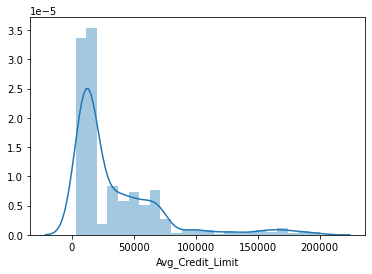

In [4]:
sns.distplot(CC_Data['Avg_Credit_Limit'])

In [5]:
CC_Data.head(25)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


# Bivariate Analysis

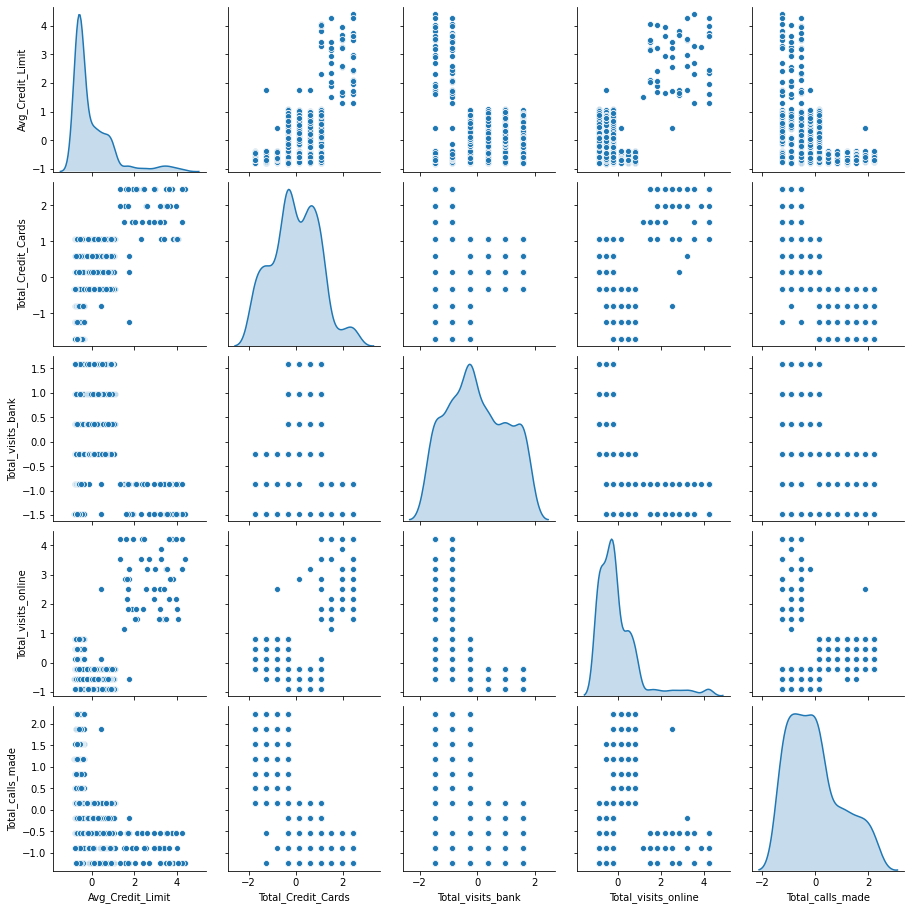

In [6]:
CC_DataAttr=CC_Data.iloc[:,2:]
CC_DataScaled=CC_DataAttr.apply(zscore) #Data is scaled, so each variable is weighted equally.
sns.pairplot(CC_DataScaled,diag_kind='kde')

### column 'Total_Credit_Cards' appears to have 4 distinct ridges, which lead us to belive the K_means model may need a minimum of 4 clusters 

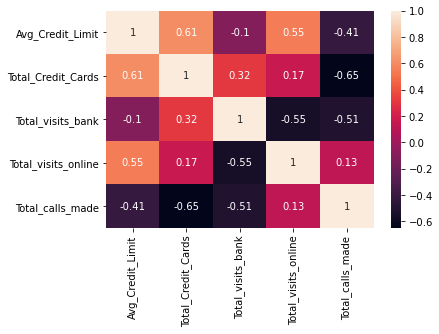

In [7]:
sns.heatmap(CC_DataScaled.corr(),annot=True)

### A few of the variables appear to have a relatively high correlation to each other. This may mean not all variables are independent of each other. PCA may need to be used when predictive models are built with this data 

#  K-means clustering 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

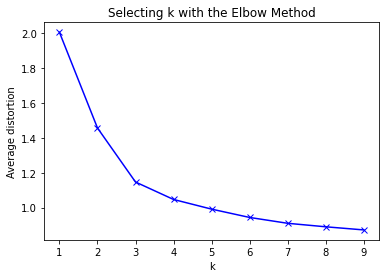

In [8]:

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(CC_DataScaled)
    prediction=model.predict(CC_DataScaled)
    meanDistortions.append(sum(np.min(cdist(CC_DataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / CC_DataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### A clear elbow seems to be present at  K=3. However, the distribution plot of column 'Total_Credit_Cards' appears to have 4 distinct ridges, which leads us to believe the K_means model may need a minimum of 4 clusters. Two clusters will be created with K=3 & K=4 and will be compared with the silhouette score

## K=3 MODEL

In [9]:
k3_model=KMeans(3)
k3_model.fit(CC_DataScaled)
k3_prediction=k3_model.predict(CC_DataScaled)


CC_DataAttr["GROUP"] = k3_prediction
CC_DataScaled['GROUP']=k3_prediction

CC_Data_k3clust = CC_DataAttr.groupby(['GROUP'])
CC_Data_k3clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6C4628E50>,
      dtype=object)

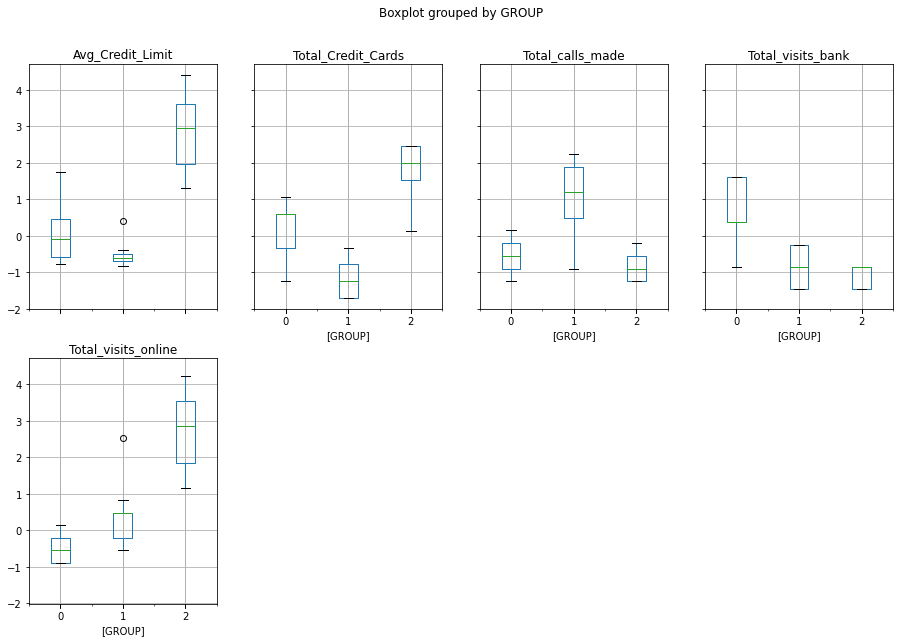

In [10]:
CC_DataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Model with K=3 appear to well distributied and signigfically different from each other 


#### Silhouette Score of K_means model K=3

In [11]:
k3s=silhouette_score(CC_DataScaled,k3_prediction,metric="euclidean",random_state=1)
k3s

0.5411228112448502

# K=4 MODEL

In [12]:
k4_model=KMeans(4)
k4_model.fit(CC_DataScaled)
k4_prediction=k4_model.predict(CC_DataScaled)


CC_DataAttr["GROUP K4"] = k4_prediction
CC_DataScaled['GROUP K4']=k4_prediction

CC_Data_k4clust = CC_DataAttr.groupby(['GROUP K4'])
CC_Data_k4clust.mean()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
GROUP K4,,,,,,
0,12161.434978,2.408072,0.937220,3.565022,6.896861,1.000000
1,31226.315789,5.478947,4.515789,1.010526,1.936842,0.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
3,36152.284264,5.538071,2.482234,0.954315,2.055838,0.005076


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6C5CCB7C0>,
      dtype=object)

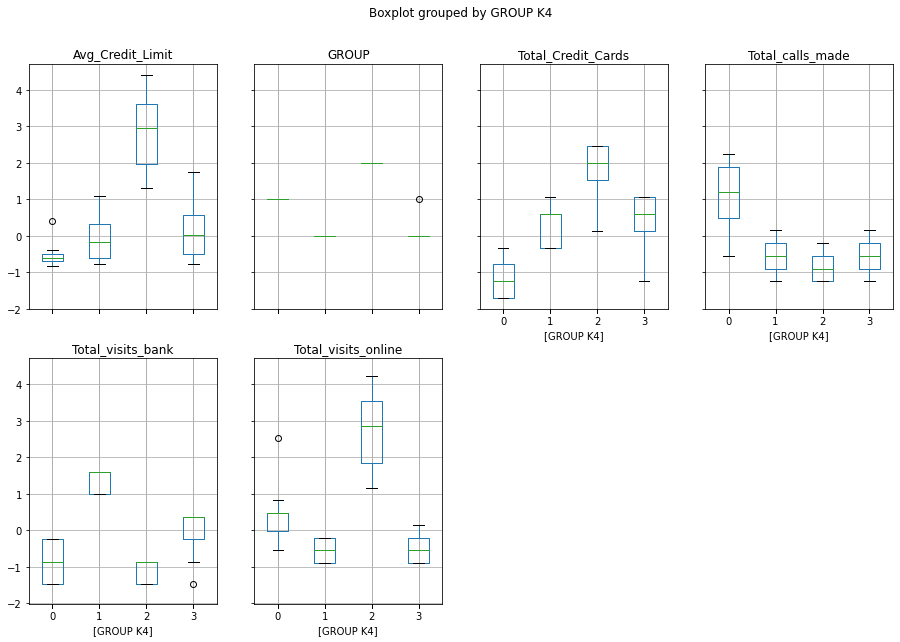

In [13]:
CC_DataScaled.boxplot(by='GROUP K4', layout = (2,4),figsize=(15,10))

### Boxplot for Model with K=4 appear to have clusters with less seperation than K=3. Silhouette scores will be calculated for both models to determine the best K value

#### Silhouette Score of K_means model K=4

In [14]:
k4s=silhouette_score(CC_DataScaled,k4_prediction,metric="euclidean",random_state=3)
k4s

0.5461332415653957

#### Silhouette Score of K_means model K=3

In [15]:
k3s

0.5411228112448502

### Silhouette score for Model with K=4 is higher than k=3 Model. This tells us that 4 clusters best repersent the data. All hierachical clustering models will be created with K=4 and with different linkage methods

# hierarchical clustering

In [16]:
Hie_CC_DataAttr=CC_Data.iloc[:,2:]
Hie_CC_DataScaled=Hie_CC_DataAttr.apply(zscore)
Hie_CC_DataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### hierarchical clustering model linkage = average 

In [17]:
Avg_Hie_Model=AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

Avg_Hie_Model

AgglomerativeClustering(linkage='average', n_clusters=4)

Hierarchical Clustering (Linkage= average) cophenet correleation : 
0.8977080867389372


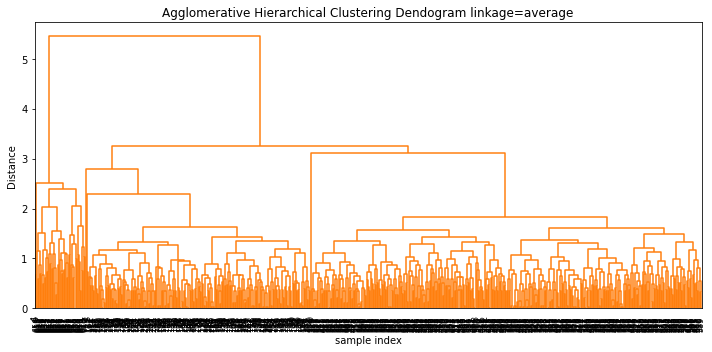

In [18]:
Avg_Z = linkage(Hie_CC_DataScaled, metric='euclidean', method='average')
Avg_c, avg_coph_dists = cophenet(Avg_Z , pdist(Hie_CC_DataScaled))

print('Hierarchical Clustering (Linkage= average) cophenet correleation : ')
print(Avg_c)


plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram linkage=average')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Avg_Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [19]:
from scipy.cluster.hierarchy import fcluster
Avg_clusters = fcluster(Avg_Z,4,criterion='maxclust')



In [20]:
from sklearn.metrics import silhouette_score
avg4s=silhouette_score(Hie_CC_DataScaled,Avg_clusters)
avg4s

0.47495143595793504

           Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP Avg                                                            
1             141040.000000            8.740000           0.600000   
2              12197.309417            2.403587           0.928251   
3              33541.450777            5.520725           3.492228   
4             100000.000000            2.000000           1.000000   

           Total_visits_online  Total_calls_made  
GROUP Avg                                         
1                    10.900000          1.080000  
2                     3.560538          6.883408  
3                     0.984456          2.010363  
4                     1.000000          0.000000  
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6C9B1D0A0>


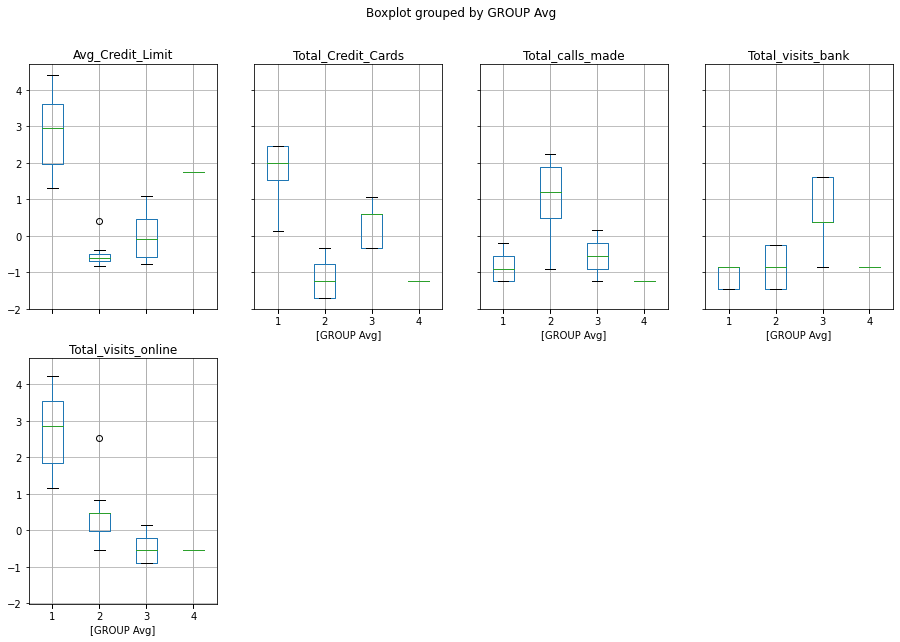

In [21]:
Avg_Attrcluster=Hie_CC_DataAttr
Avg_Scaledcluster=Hie_CC_DataScaled

Avg_Attrcluster["GROUP Avg"] = Avg_clusters
Avg_Scaledcluster['GROUP Avg']=Avg_clusters
Avg_AttrGroupby=Avg_Attrcluster.groupby(['GROUP Avg'])
Avg_ScaledGroupby=Avg_Scaledcluster.groupby(['GROUP Avg'])

print(Avg_AttrGroupby.mean())
print(Avg_Scaledcluster.boxplot(by='GROUP Avg', layout = (2,4),figsize=(15,10)))

In [22]:
Hie_CC_DataAttr

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP Avg
0,100000,2,1,1,0,4
1,50000,3,0,10,9,2
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


### hierarchical clustering model linkage = ward 

In [23]:
Wrd_Hie_Model=AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')

Wrd_Hie_Model

AgglomerativeClustering(n_clusters=4)

Hierarchical Clustering (Linkage= Ward) cophenet correleation : 
0.7748384377079748


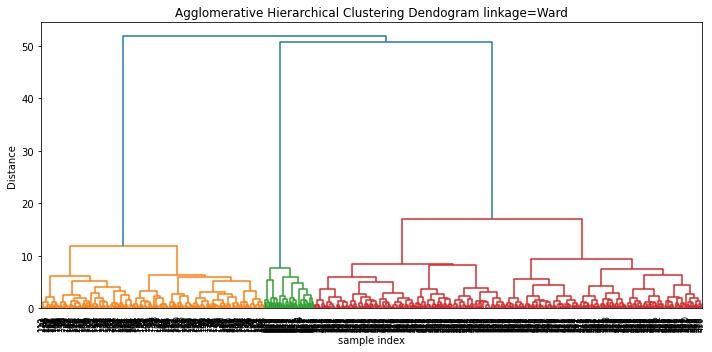

In [24]:
Wrd_Z = linkage(Hie_CC_DataScaled, metric='euclidean', method='ward')
Wrd_c, Wrd_coph_dists = cophenet(Wrd_Z , pdist(Hie_CC_DataScaled))

print('Hierarchical Clustering (Linkage= Ward) cophenet correleation : ')
print(Wrd_c)


plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram linkage=Ward')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Wrd_Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [25]:

Wrd_clusters = fcluster(Wrd_Z,4,criterion='maxclust')
print('Ward Silhouette Score:')
wrd4s=silhouette_score(Hie_CC_DataScaled,Wrd_clusters)
wrd4s

Ward Silhouette Score:


0.36266950541639736

           Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP Wrd                                                            
1             141040.000000            8.740000           0.600000   
2              12197.309417            2.403587           0.928251   
3              33541.450777            5.520725           3.492228   
4             100000.000000            2.000000           1.000000   

           Total_visits_online  Total_calls_made  
GROUP Wrd                                         
1                    10.900000          1.080000  
2                     3.560538          6.883408  
3                     0.984456          2.010363  
4                     1.000000          0.000000  
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6CA1EDB80>


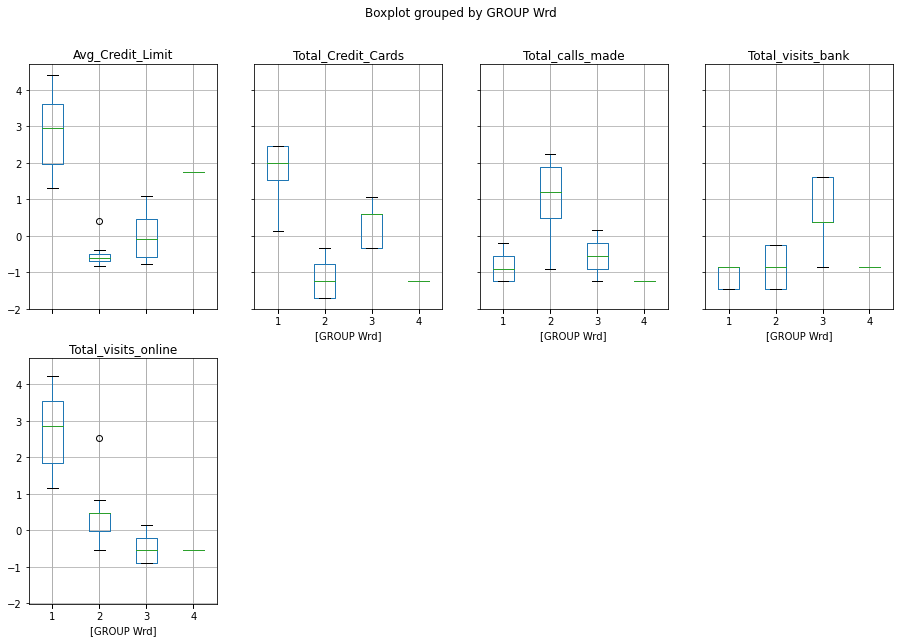

In [26]:
Wrd_Attrcluster=Hie_CC_DataAttr.iloc[:,0:5]
Wrd_Scaledcluster=Hie_CC_DataScaled.iloc[:,0:5]

Wrd_Attrcluster["GROUP Wrd"] = Avg_clusters
Wrd_Scaledcluster['GROUP Wrd']=Avg_clusters
Wrd_AttrGroupby=Wrd_Attrcluster.groupby(['GROUP Wrd'])
Wrd_ScaledGroupby=Wrd_Scaledcluster.groupby(['GROUP Wrd'])

print(Wrd_AttrGroupby.mean())
print(Wrd_Scaledcluster.boxplot(by='GROUP Wrd', layout = (2,4),figsize=(15,10)))

### hierarchical clustering model linkage = Centroid 

In [27]:
Cnt_Hie_Model=AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='centroid')

Cnt_Hie_Model

AgglomerativeClustering(linkage='centroid', n_clusters=4)

Hierarchical Clustering (Linkage= average) cophenet correleation : 
0.9135935087273496


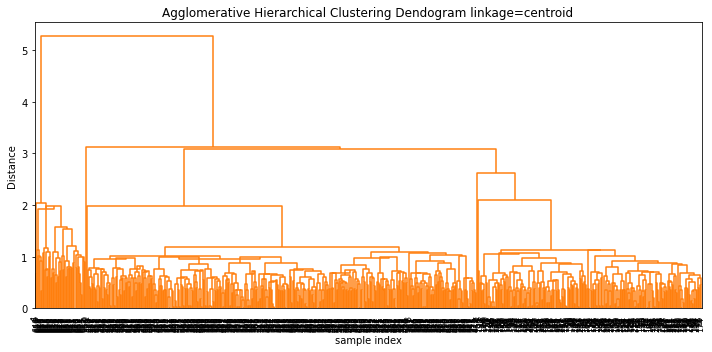

In [28]:
Cnt_Z = linkage(Hie_CC_DataScaled, metric='euclidean', method='centroid')
Cnt_c,Cnt_coph_dists = cophenet(Cnt_Z , pdist(Hie_CC_DataScaled))

print('Hierarchical Clustering (Linkage= average) cophenet correleation : ')
print(Cnt_c)


plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram linkage=centroid')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Cnt_Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [29]:
from scipy.cluster.hierarchy import fcluster
Cnt_clusters = fcluster(Cnt_Z,4,criterion='maxclust')
from sklearn.metrics import silhouette_score
cnt4s=silhouette_score(Hie_CC_DataScaled,Cnt_clusters)
cnt4s

0.5102605013758343

           Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP Cnt                                                            
1             141040.000000            8.740000           0.600000   
2              33541.450777            5.520725           3.492228   
3              12197.309417            2.403587           0.928251   
4             100000.000000            2.000000           1.000000   

           Total_visits_online  Total_calls_made  
GROUP Cnt                                         
1                    10.900000          1.080000  
2                     0.984456          2.010363  
3                     3.560538          6.883408  
4                     1.000000          0.000000  
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6CBA990D0>


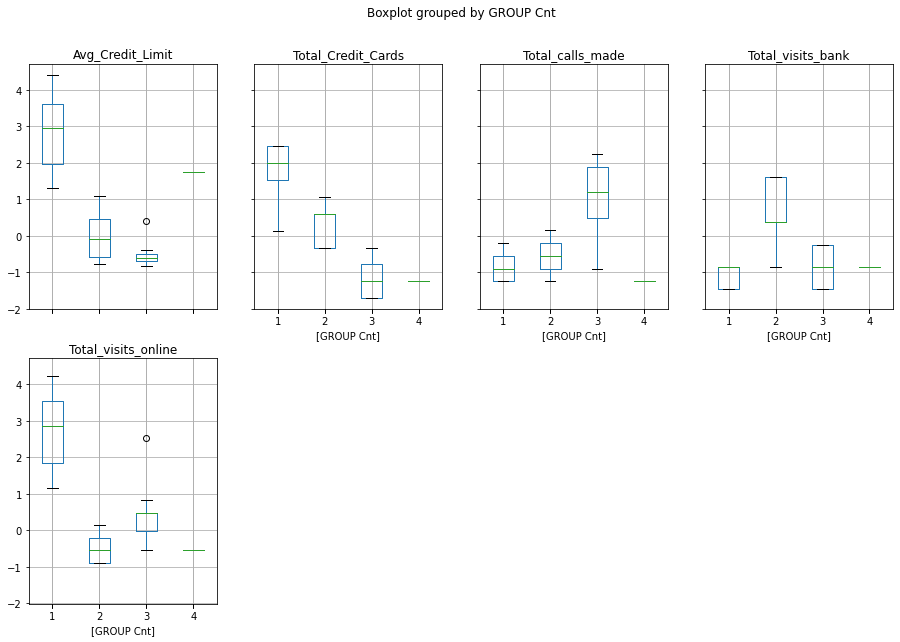

In [30]:
Cnt_Attrcluster=Hie_CC_DataAttr.iloc[:,0:5]
Cnt_Scaledcluster=Hie_CC_DataScaled.iloc[:,0:5]

Cnt_Attrcluster["GROUP Cnt"] = Cnt_clusters
Cnt_Scaledcluster['GROUP Cnt']=Cnt_clusters
Cnt_AttrGroupby=Cnt_Attrcluster.groupby(['GROUP Cnt'])
Cnt_ScaledGroupby=Cnt_Scaledcluster.groupby(['GROUP Cnt'])

print(Cnt_AttrGroupby.mean())
print(Cnt_Scaledcluster.boxplot(by='GROUP Cnt', layout = (2,4),figsize=(15,10)))

### hierarchical clustering model linkage = Complete 

In [31]:
Com_Hie_Model=AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='complete')

Com_Hie_Model

AgglomerativeClustering(linkage='complete', n_clusters=4)

Hierarchical Clustering (Linkage= complete) cophenet correleation : 
0.9000151402944415


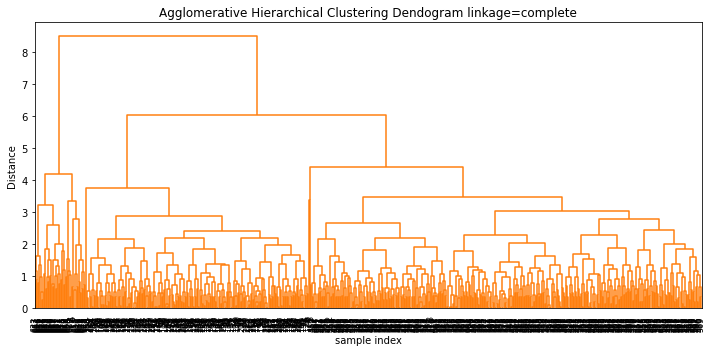

In [32]:
Com_Z = linkage(Hie_CC_DataScaled, metric='euclidean', method='complete')
Com_c, Com_coph_dists = cophenet(Com_Z , pdist(Hie_CC_DataScaled))

print('Hierarchical Clustering (Linkage= complete) cophenet correleation : ')
print(Com_c)


plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram linkage=complete')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Com_Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [33]:
from scipy.cluster.hierarchy import fcluster
Com_clusters = fcluster(Avg_Z,4,criterion='maxclust')
from sklearn.metrics import silhouette_score
com4s=silhouette_score(Hie_CC_DataScaled,Com_clusters)
com4s

0.5102605013758343

           Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP Com                                                            
1             141040.000000            8.740000           0.600000   
2              12197.309417            2.403587           0.928251   
3              33541.450777            5.520725           3.492228   
4             100000.000000            2.000000           1.000000   

           Total_visits_online  Total_calls_made  
GROUP Com                                         
1                    10.900000          1.080000  
2                     3.560538          6.883408  
3                     0.984456          2.010363  
4                     1.000000          0.000000  
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6C59EDFD0>


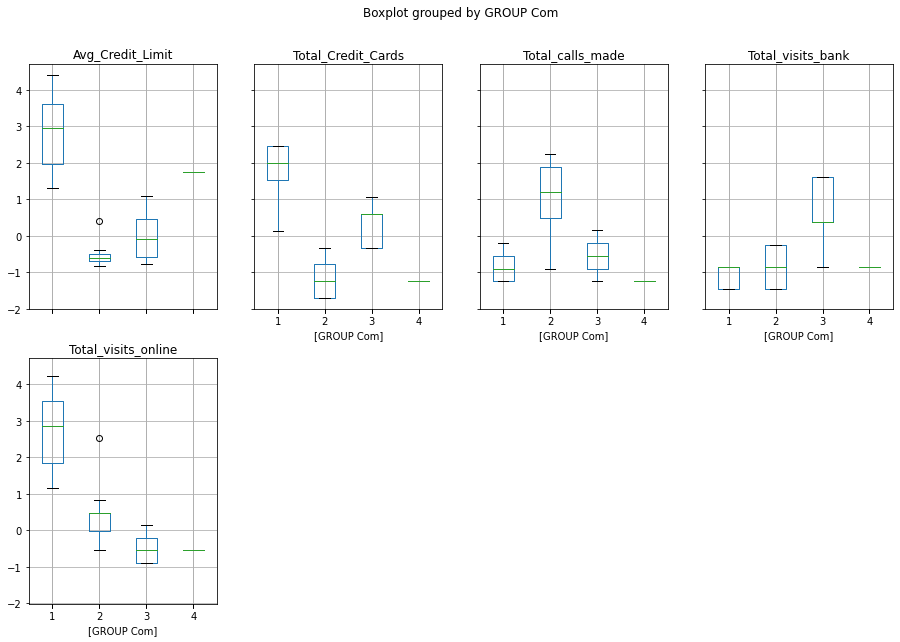

In [34]:
Com_Attrcluster=Hie_CC_DataAttr.iloc[:,0:5]
Com_Scaledcluster=Hie_CC_DataScaled.iloc[:,0:5]

Com_Attrcluster["GROUP Com"] = Com_clusters
Com_Scaledcluster['GROUP Com']=Com_clusters
Com_AttrGroupby=Com_Attrcluster.groupby(['GROUP Com'])
Com_ScaledGroupby=Com_Scaledcluster.groupby(['GROUP Com'])

print(Com_AttrGroupby.mean())
print(Com_Scaledcluster.boxplot(by='GROUP Com', layout = (2,4),figsize=(15,10)))

# Model Comparision 

In [35]:
Summary= pd.DataFrame({'Model':['Kmeans K=3','Kmeans K=4',
                                'Hierarchical Model Linkage = Complete',
                               'Hierarchical Model Linkage = Centroid ',
                                'Hierarchical  Model Linkage = ward',
                               'Hierarchical Model Linkage = Average '],'Silhouette Scores': [k3s,k4s,com4s,cnt4s,wrd4s,avg4s],})

print(Summary)

                                    Model  Silhouette Scores
0                              Kmeans K=3           0.541123
1                              Kmeans K=4           0.546133
2   Hierarchical Model Linkage = Complete           0.510261
3  Hierarchical Model Linkage = Centroid            0.510261
4      Hierarchical  Model Linkage = ward           0.362670
5   Hierarchical Model Linkage = Average            0.474951


# Best Model

In [36]:
(((CC_DataAttr["GROUP K4"]==0).sum()/660)*100)

33.78787878787879

In [37]:
x=pd.DataFrame({'% of total Cutomers':[(((CC_DataAttr["GROUP K4"]==0).sum()/660)*100),
                (((CC_DataAttr["GROUP K4"]==1).sum()/660)*100),
               (((CC_DataAttr["GROUP K4"]==2).sum()/660)*100),
               (((CC_DataAttr["GROUP K4"]==3).sum()/660)*100)]})
x

,% of total Cutomers
0,33.787879
1,28.787879
2,7.575758
3,29.848485


In [38]:
Summary=CC_Data_k4clust.mean()
Summary['% of total Cutomers']=x
Summary

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,% of total Cutomers
GROUP K4,,,,,,,
0,12161.434978,2.408072,0.937220,3.565022,6.896861,1.000000,33.787879
1,31226.315789,5.478947,4.515789,1.010526,1.936842,0.000000,28.787879
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,7.575758
3,36152.284264,5.538071,2.482234,0.954315,2.055838,0.005076,29.848485


#### Based on the "Model Comparision" data frame the k-means clusters where K = 4 produce the highest silhouette score. Key questions will be answered using information gathered from this model.
#### 1. How many different segments of customers are there? 
4 clusters of customers seem to best fit the data

#### 2. How are these segments different from each other?
Customers have been grouped into 4 sectors:

Group 1 - Group 1 makes up 29.69 % of AllLife Bank's total customers. Most of their contact to the bank is in person or over the phone. Group 1 generally has 6 Credit cards open at one time with a credit limit of around $36,250.

Group 2- Group 2 makes up 28.79 % of AllLife Bank's total customers. Group 2 is similar to group 1 in there credit limit but tends to visit the bank more often, most through bank visits followed by phone 

Group 3 - Group 3 is AllLife's Bank's largest customer group, making up 33.94 % of their total customers. Group 3 interacts with the bank the most. The majority of interactions are over the phone. Group 3 has the lowest credit limit out of all customers.

Group 4- Group 4 is the smallest customer group at 7.58% of the bank's total customers. Group 4 has the highest credit limit and opened credit cards. Group 4 tends to visit the online bank majority of the time.

#### 3. . What are your recommendations to the bank on how to better market to and service these customers?
Based off the Data Reasearch AllLife Bank shoud exersice the following activites:
    
To upscale to exsisting customer AllLife Bank should focus on Group 3 since they make up the largest group of the customer basis 
they also have the most room for growth in ther credit limit

The bank should avertise to group 3 customers over the phone since it is their most common method of bank interactions 

# Gethub Link:

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-c4bantle/blob/master/Customer%20Segmentation%20Project%20-%20Clayton%20Bantle.ipynb